# **python 3: essentials** - part 6/11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

## **Introductory SciPy**

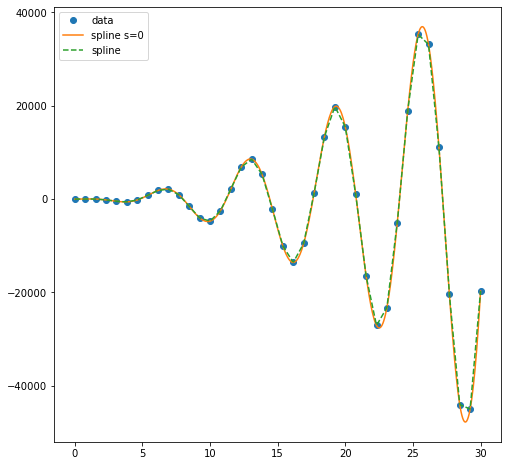

In [2]:
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.interpolate import UnivariateSpline

x = np.linspace(0,30,40)

y = x**3*np.sin(x) + 50*x**2*np.cos(x) + x

s1 = InterpolatedUnivariateSpline(x,y) # here the smoothing is automatically set to s=0

s2 = UnivariateSpline(x,y,k=1) # linear interpolation

x_new = np.linspace(0,30,500)

fig, ax=plt.subplots(figsize=(8,8))

ax.plot(x,y,'o',label='data')

ax.plot(x_new, s1(x_new),label='spline s=0')
ax.plot(x_new, s2(x_new),'--',label='spline')

ax.legend()

### **Integration**
- for 1D general integration

In [3]:
from scipy import integrate
import numpy as np

# compute the integral of x^2 between 0 and 5
result = integrate.quad(lambda x: 3*x**2, 0, 5)
print(result)

(125.00000000000001, 1.3877787807814459e-12)


- for 2D integration \ Consider the integral $$I = \int_{y=0}^{1/2} \int_{x=0}^{1-2y} x y \ dx dx = \frac{1}{96}$$ note that the limits are also lambda functions!

In [4]:
area = integrate.dblquad(lambda y, x: x*y, 0, 0.5, lambda x: 0, lambda x: 1-2*x)
print("Numerical result:",area)
print("Analytical result:",1/96)

Numerical result: (0.010416666666666668, 4.101620128472366e-16)
Analytical result: 0.010416666666666666


- Integration from function samples

In [5]:
def f(x):
    return 3*x**2

# compute the integral with different number of samples, they can be non-evenly spaced!
for i in [100,1000,10000,100000]:
    x_samp = np.linspace(0,5,i)
    y_samp = f(x_samp)
    I = integrate.trapezoid(y_samp,x_samp)
    print("Result(n =",i,") =", I,"; rel err =",(I-125)/125)

AttributeError: module 'scipy.integrate' has no attribute 'trapezoid'

- Ordinary differential equations (ODE)

In [ ]:
from scipy.integrate import ode

# system of differential equations
def pend(t, y, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

# function use to save output
def solout(t, y):
    sol.append([t, y[0], y[1]])

# integrator initialisation, here we choose the alogorithm dop853
solver = ode(pend).set_integrator("dop853",atol=1e-15,rtol=1e-15,first_step=0.01,nsteps=10000000)
solver.set_solout(solout)
solver.set_initial_value([np.pi - 0.1, 0.0]).set_f_params(0.25,5.0)

sol = []
solver.integrate(10)

sol = np.array(sol)

print(sol)
print(solver.t,solver.y)

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# system of differential equations
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

# perform the integration
sol = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1, 3, 1), dense_output=True)

# densely sample the solution
t = np.linspace(0, 15, 600)
z = sol.sol(t) # this exists because dense_output=True

# plots
fig, ax=plt.subplots(1,2,figsize=(14,14))

ax[0].plot(sol.t, sol.y[0],'o')
ax[0].plot(t,z[0],'-')

ax[1].plot(sol.t, sol.y[1],'o')
ax[1].plot(t,z[1],'-')

ax[0].set_xlim(0,7)
ax[1].set_xlim(0,7)

ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[1].set_aspect(1/ax[1].get_data_ratio())

- ex. Lorenz attractor

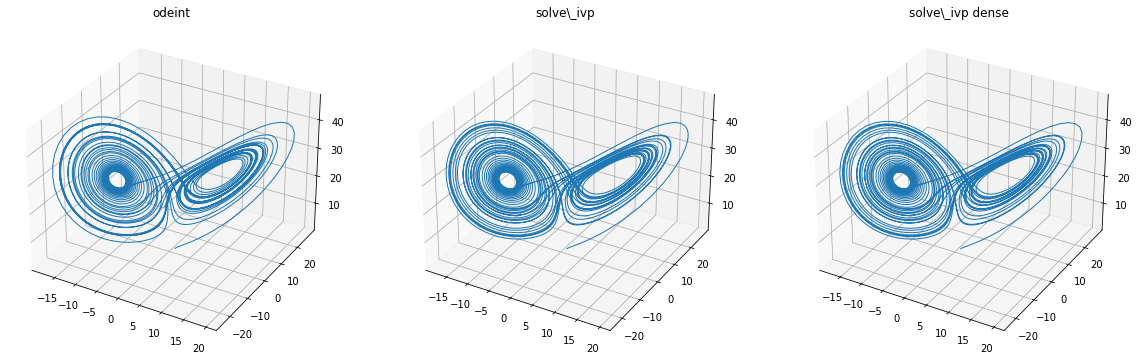

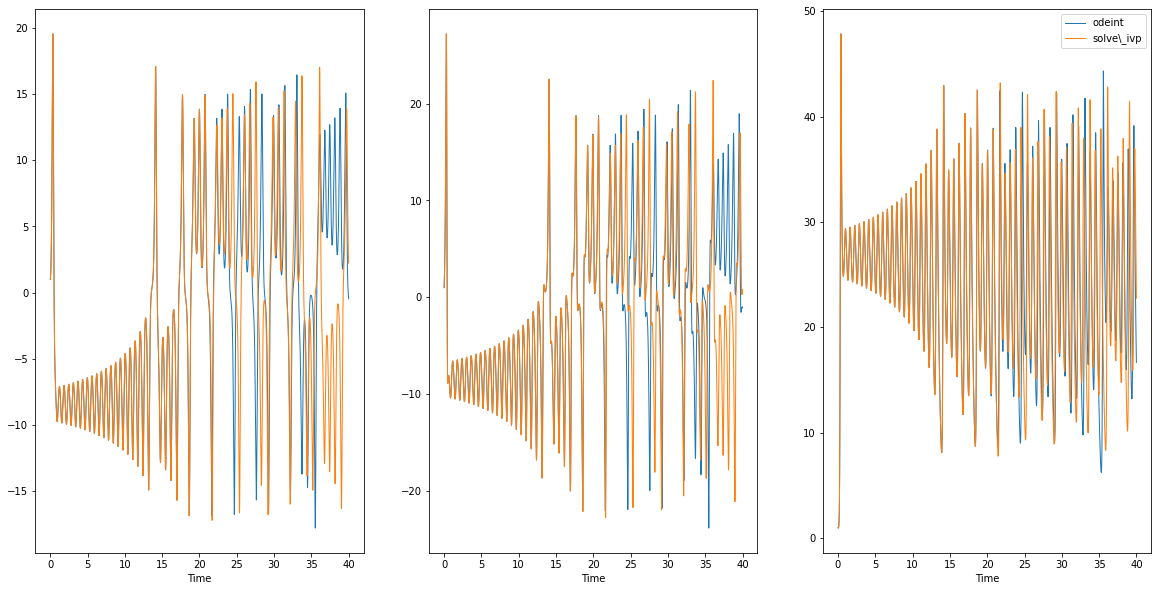

In [6]:
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from mpl_toolkits import mplot3d

#############################################

def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
#############################################

sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0
 
p = (sigma, beta, rho)  # Parameters of the system
 
y0 = [1.0, 1.0, 1.0]  # Initial state of the system
##############################################

t_span = (0.0, 40.0)
t = np.arange(0.0, 40.0, 0.01)
 
result_odeint = odeint(lorenz, y0, t, p, tfirst=True)

result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p, method='DOP853',dense_output=True,atol=1e-13,rtol=5e-14)
sol_ivp_dense = result_solve_ivp.sol(t)
##############################################

fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot(result_odeint[:, 0],
        result_odeint[:, 1],
        result_odeint[:, 2],lw=1)
ax1.set_title("odeint")
 
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.plot(result_solve_ivp.y[0, :],
        result_solve_ivp.y[1, :],
        result_solve_ivp.y[2, :],lw=1)
ax2.set_title(r"solve\_ivp")

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot(sol_ivp_dense[0, :],
        sol_ivp_dense[1, :],
        sol_ivp_dense[2, :],lw=1)
ax3.set_title(r"solve\_ivp dense")


fig2, axx2=plt.subplots(1,3,figsize=(20,10))

axx2[0].plot(t, result_odeint[:, 0],lw=1)
axx2[0].plot(t, sol_ivp_dense[0, :],lw=1)
axx2[0].set_xlabel("Time")

axx2[1].plot(t, result_odeint[:, 1],lw=1)
axx2[1].plot(t, sol_ivp_dense[1, :],lw=1)
axx2[1].set_xlabel("Time")

axx2[2].plot(t, result_odeint[:, 2],lw=1,label='odeint')
axx2[2].plot(t, sol_ivp_dense[2, :],lw=1,label=r'solve\_ivp')
axx2[2].set_xlabel("Time")

axx2[2].legend()